# Q-1. 

### Business Understanding:

    We have to build a model which will be able to predict if an user will accept the friend request or not using supervised algorithm.

In [30]:
# Importing libraries

# Default
import os


# dataframe operations
import numpy as np
import math
from dask import dataframe as dd

import mlflow
from mlflow import log_metric, log_param, log_artifact

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Sk-learn libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Dask is an open-source Python library that lets you work on arbitrarily large datasets and dramatically increases the speed of your computations. Dask leverages pandas under cover and distributes multiple pandas datafraame when scaled out.

In [31]:
# Getting the present working directory

os.getcwd()

'D:\\FSDS-iNeuron\\3.Resource\\Dataset\\Placement_Task\\FacebookRecruiting'

In [32]:
# Changing the directory to dataset directory to read data 

os.chdir('D:\\FSDS-iNeuron\\3.Resource\\Dataset\\Placement_Task\\FacebookRecruiting')

In [33]:
os.getcwd()

'D:\\FSDS-iNeuron\\3.Resource\\Dataset\\Placement_Task\\FacebookRecruiting'

In [34]:
# List of files

os.listdir()

['bfs_benchmark.csv',
 'FacebookRecruiting.zip',
 'mlruns',
 'model',
 'random_benchmark.csv',
 'test.csv',
 'train.7z',
 'train.csv',
 'train.gz',
 'train.zip']

In [35]:
# Reading 1000 rows of data
# Using head() to force compute and show rows

df = dd.read_csv('train.csv').head(n=1000)  # Act like pandas dataframe
df.head()

,source_node,destination_node
0,1,690569
1,1,315892
2,1,189226
3,2,834328
4,2,1615927


In [36]:
# Test data

df_test = dd.read_csv('test.csv')  # Act like dask dataframe
df_test.head(n=10)

,source_node
0,20
1,24
2,31
3,35
4,42
5,49
6,52
7,62
8,71
9,74


### Let's Understand the data

**Data Set Information:**

Dataset contains the directed social graph, represented in a 2-column csv (source_node, destination_node). 

In [37]:
type(df)

pandas.core.frame.DataFrame

In [38]:
type(df_test)

dask.dataframe.core.DataFrame

In [39]:
# Data type of columns

df.dtypes.head()

source_node         int64
destination_node    int64
dtype: object

In [40]:
# Description of the data

df.describe()

,source_node,destination_node
count,1000.000000,1.000000e+03
mean,116.239000,9.221285e+05
std,59.722045,5.433515e+05
min,1.000000,1.435000e+03
25%,65.000000,4.545052e+05
50%,122.000000,9.174825e+05
75%,170.000000,1.387296e+06
max,216.000000,1.861931e+06


In [41]:
# Columns of the datadet

df.columns

Index(['source_node', 'destination_node'], dtype='object')

In [42]:
df.shape

(1000, 2)

In [43]:
# Basic information on dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   source_node       1000 non-null   int64
 1   destination_node  1000 non-null   int64
dtypes: int64(2)
memory usage: 15.8 KB


In [44]:
# Checking nul values

df.isna().sum()

source_node         0
destination_node    0
dtype: int64

#### Observation:
- There are 0 missing data

In [45]:
# Checking duplicate records

df.duplicated().sum()

0

#### Observation:
- There are 0 duplicate data

### EDA

### Univariate Analysis

**"source_node"**

In [46]:
df['source_node']

0        1
1        1
2        1
3        2
4        2
      ... 
995    216
996    216
997    216
998    216
999    216
Name: source_node, Length: 1000, dtype: int64

<Axes: >

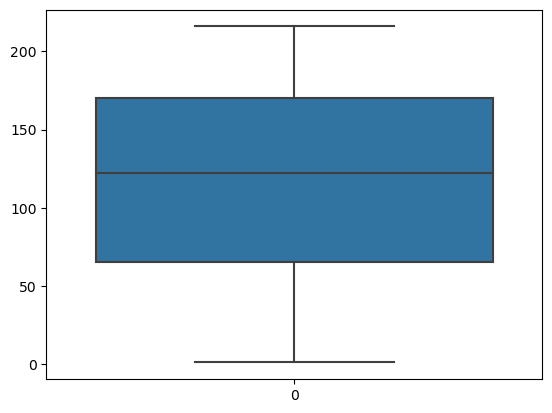

In [47]:
sns.boxplot(df['source_node'])

**Observation:**
- Dataset has no outlier

<Axes: xlabel='source_node', ylabel='Density'>

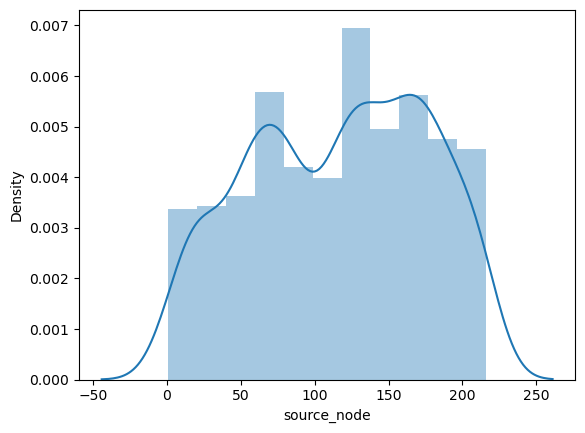

In [48]:
sns.distplot(df['source_node'])

**Observation:**
- Dataset is approx normally distributed

**"destination_node"**

In [49]:
df['destination_node']

0       690569
1       315892
2       189226
3       834328
4      1615927
        ...   
995    1805592
996    1216771
997    1198938
998     530173
999    1287580
Name: destination_node, Length: 1000, dtype: int64

<Axes: >

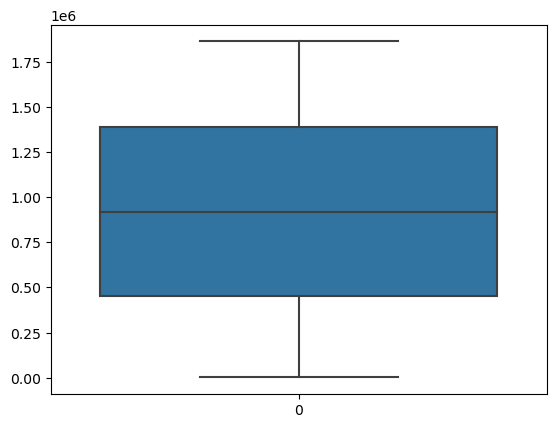

In [50]:
sns.boxplot(df['destination_node'])

**Observation:**
- Dataset has no outlier

<Axes: xlabel='destination_node', ylabel='Density'>

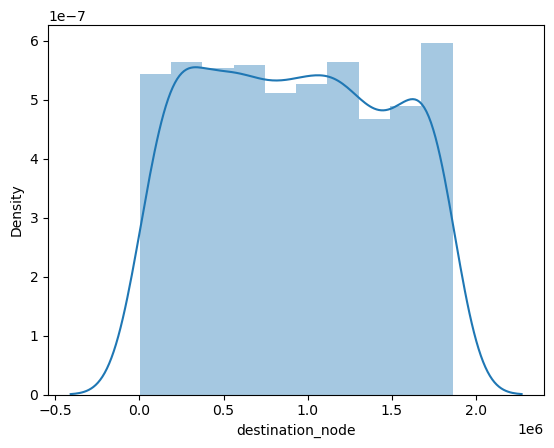

In [51]:
sns.distplot(df['destination_node'])

**Observation:**
- Dataset is approx normally distributed

In [57]:
# Pandas profiling
from pandas_profiling import ProfileReport

pf = ProfileReport(df)

pf.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

#### Selecting columns for X and y 

In [52]:
X_train = df.drop('destination_node', axis=1)
y_train = df['destination_node']

#### Train test split

In [53]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

### Model building

In [54]:
model = RandomForestClassifier()

# Fitting model
model.fit(X_train, y_train)

RandomForestClassifier()

### Model evaluation

In [55]:
# Evaluate the model's performance on the validation set

val_predictions = model.predict(X_val)
accuracy = accuracy_score(y_val, val_predictions)
log_metric('accuracy', accuracy)

In [56]:
# Making predictions on the test data

test_predictions = model.predict(df_test.compute())


KeyboardInterrupt



In [ ]:
# Log parameters and metrics to MLflow

log_param('model', 'Random Forest')
log_metric('test_predictions_mean', test_predictions.mean())

In [ ]:
# Save the model and artifacts using MLflow

mlflow.sklearn.save_model(model, 'model')
log_artifact('model')

### Initializing MLFlow

In [ ]:
# Defining param and metric

param_value = mlflow.log_param('learning_rate', 0.001)
metric_name = 'accuracy'
metric_value = 0.85
mlflow.log_metric(metric_name, metric_value)

In [ ]:
import mlflow

# Start an MLflow run
mlflow.start_run()

# Log parameters
mlflow.log_param('param_name', param_value)

# Log metrics
mlflow.log_metric('metric_name', metric_value)

# Log artifacts (files)
mlflow.log_artifact('D:\\FSDS-iNeuron\\PlacementAccessment\\ML')

# End the MLflow run
mlflow.end_run()

#### starting the MLflow server

In [ ]:
# runing commanda in terminal to get the UI

mlflow ui

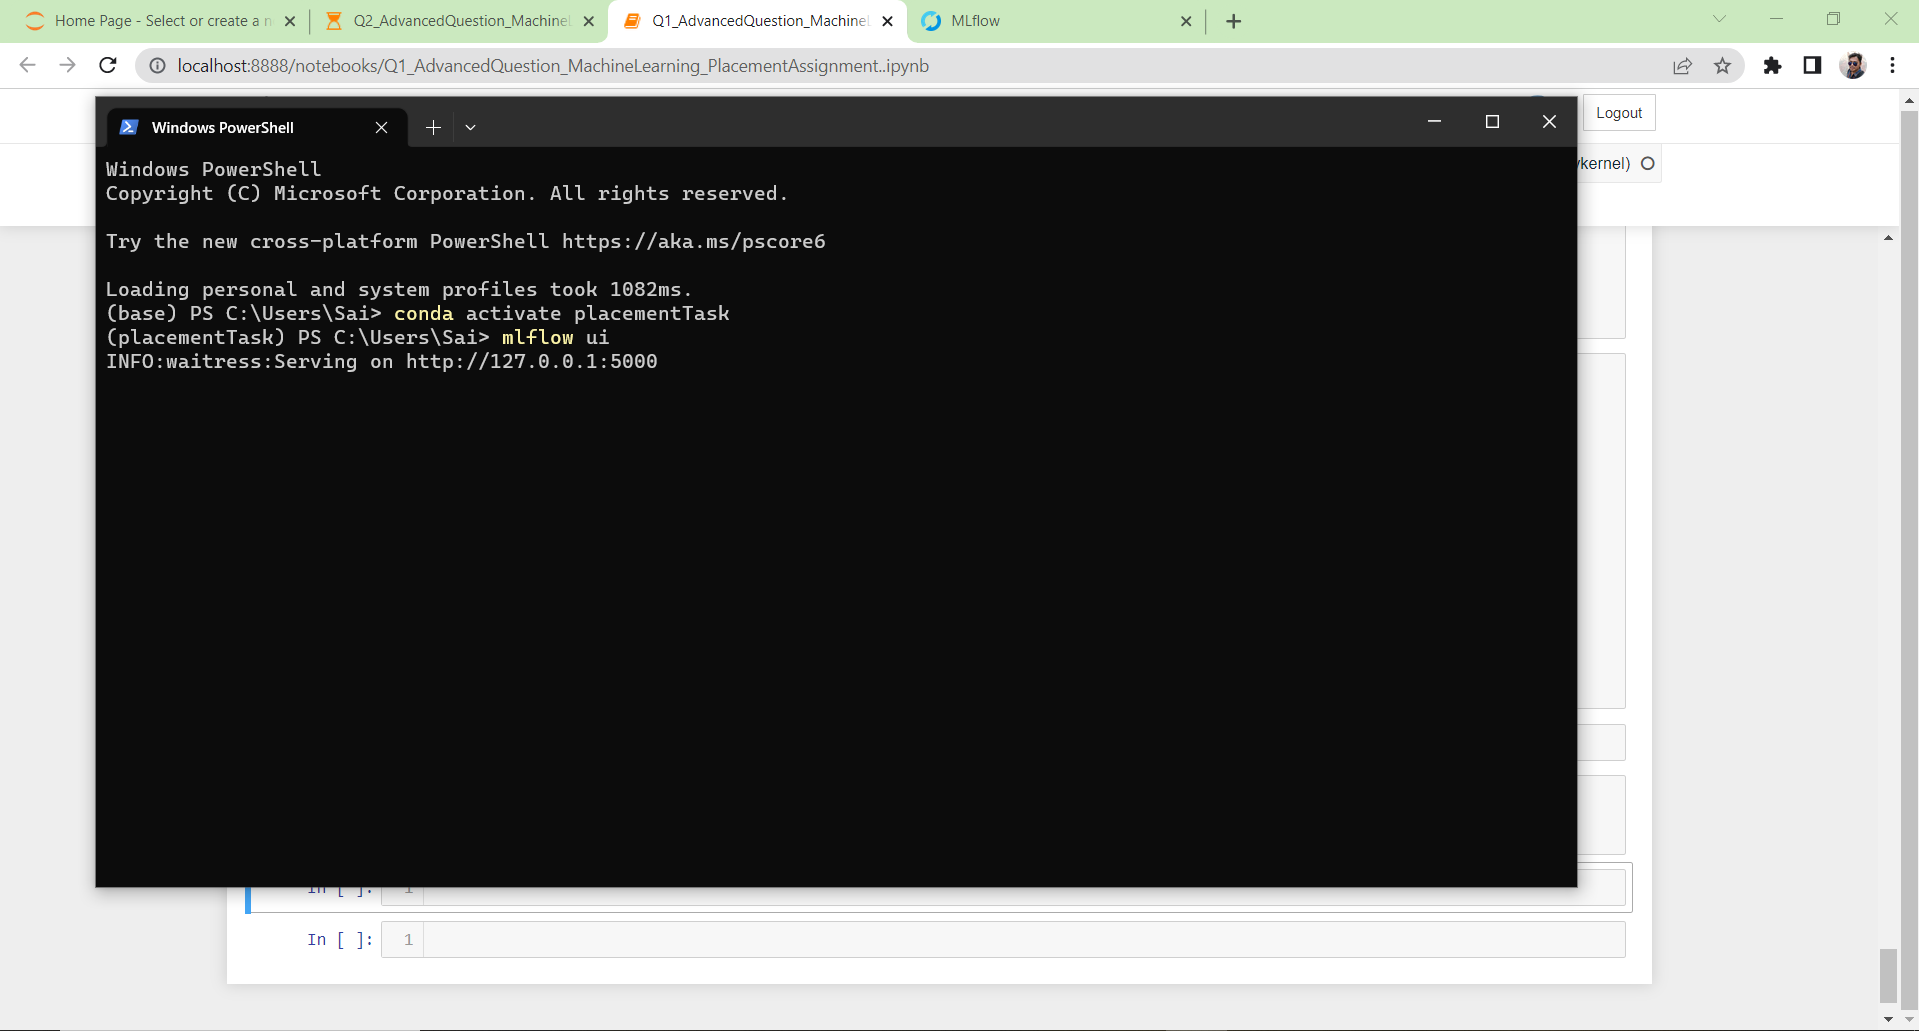

http://127.0.0.1:5000/

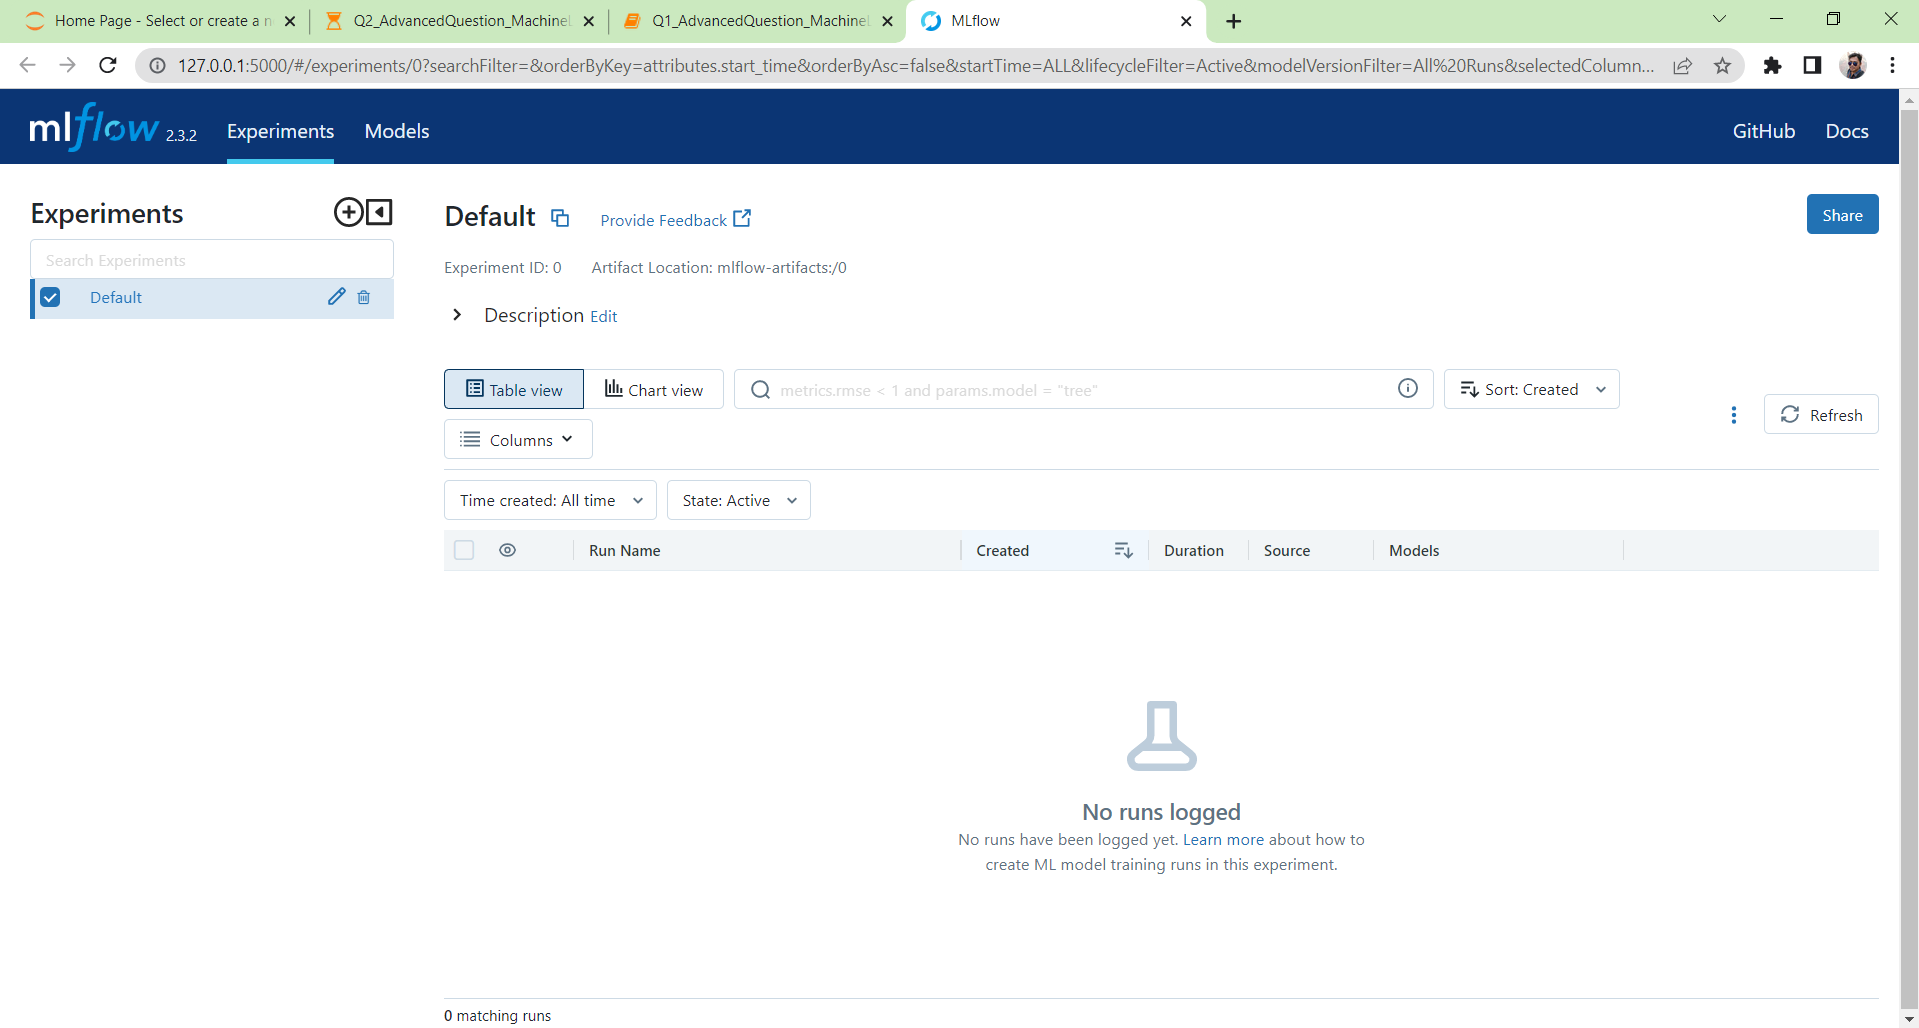